clean data with nlp

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px


In [3]:
df=pd.read_csv('BA-nlp')

In [4]:
df.head()

,Unnamed: 0,country,date,reviews,rating,verified,clean_review
0,0,(United Kingdom),2023-01-24,✅ Trip Verified | Excellent service both on th...,3,True,excellent service ground board first class pro...
1,1,(United Kingdom),2023-01-24,✅ Trip Verified | Good lounge at Cape Town. O...,4,True,good lounge cape town time departure drink hig...
2,2,(United Kingdom),2023-01-23,✅ Trip Verified | A really excellent journey....,3,True,really excellent journey lounge overcrowded la...
3,3,(United Kingdom),2023-01-21,✅ Trip Verified | This flight was one of the ...,1,True,flight one worst ever life wanted pamper bough...
4,4,(United States),2023-01-19,Not Verified | It seems that there is a race t...,9,False,verified seems race bottom amongst airline can...


In [5]:
#fig = px.line(df, x='date', y="rating")
#fig.update_xaxes(rangeslider_visible=True)
#fig.show()

Clean review


In [6]:
df['clean_review'].iloc[0]

'excellent service ground board first class product might leading edge service around entire experience well worth cost ticket concorde room heathrow well managed great place relax prior trip flight slightly delayed heathrow arrived schedule johannesburg'

In [7]:
df['word_count'] = df['clean_review'].apply(lambda x: len(str(x).split(" ")))

In [8]:
#df.head()

In [9]:
from textblob import TextBlob

In [10]:
sentiment = df['clean_review'].apply(lambda x: 
                   TextBlob(x).sentiment.polarity)

In [11]:
df['sentiment']=sentiment

In [12]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
df.head()

,country,date,reviews,rating,verified,clean_review,word_count,sentiment
0,(United Kingdom),2023-01-24,✅ Trip Verified | Excellent service both on th...,3,True,excellent service ground board first class pro...,35,0.311905
1,(United Kingdom),2023-01-24,✅ Trip Verified | Good lounge at Cape Town. O...,4,True,good lounge cape town time departure drink hig...,19,0.260000
2,(United Kingdom),2023-01-23,✅ Trip Verified | A really excellent journey....,3,True,really excellent journey lounge overcrowded la...,78,0.245059
3,(United Kingdom),2023-01-21,✅ Trip Verified | This flight was one of the ...,1,True,flight one worst ever life wanted pamper bough...,99,-0.052760
4,(United States),2023-01-19,Not Verified | It seems that there is a race t...,9,False,verified seems race bottom amongst airline can...,56,-0.142500


Wordcloud for clean_review

In [15]:
import wordcloud
import nltk
from nltk.corpus import stopwords 
from wordcloud import WordCloud



In [16]:
text = " ".join(df.clean_review)

In [17]:
wordcloud=WordCloud(collocations=False , max_words=1000,stopwords='english',background_color='black').generate(text)

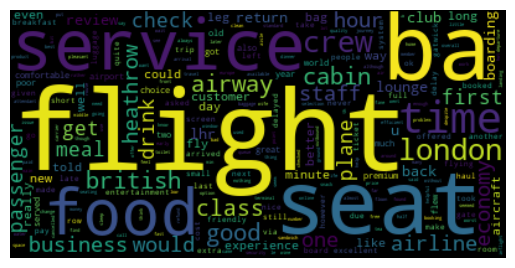

In [18]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
#nltk.download('punkt')
from nltk import word_tokenize
from nltk.probability import FreqDist

In [43]:

words = text.split(' ')


new_words = [ word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(30)


all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'flight'),
  Text(1, 0, 'ba'),
  Text(2, 0, 'seat'),
  Text(3, 0, 'service'),
  Text(4, 0, 'food'),
  Text(5, 0, 'time'),
  Text(6, 0, 'london'),
  Text(7, 0, 'crew'),
  Text(8, 0, 'british'),
  Text(9, 0, 'airway'),
  Text(10, 0, 'good'),
  Text(11, 0, 'cabin'),
  Text(12, 0, 'class'),
  Text(13, 0, 'hour'),
  Text(14, 0, 'airline'),
  Text(15, 0, 'one'),
  Text(16, 0, 'business'),
  Text(17, 0, 'staff'),
  Text(18, 0, 'heathrow'),
  Text(19, 0, 'would'),
  Text(20, 0, 'economy'),
  Text(21, 0, 'get'),
  Text(22, 0, 'passenger'),
  Text(23, 0, 'first'),
  Text(24, 0, 'check'),
  Text(25, 0, 'drink'),
  Text(26, 0, 'meal'),
  Text(27, 0, 'plane'),
  Text(28, 0, 'lounge'),
  Text(29, 0, 'return')])

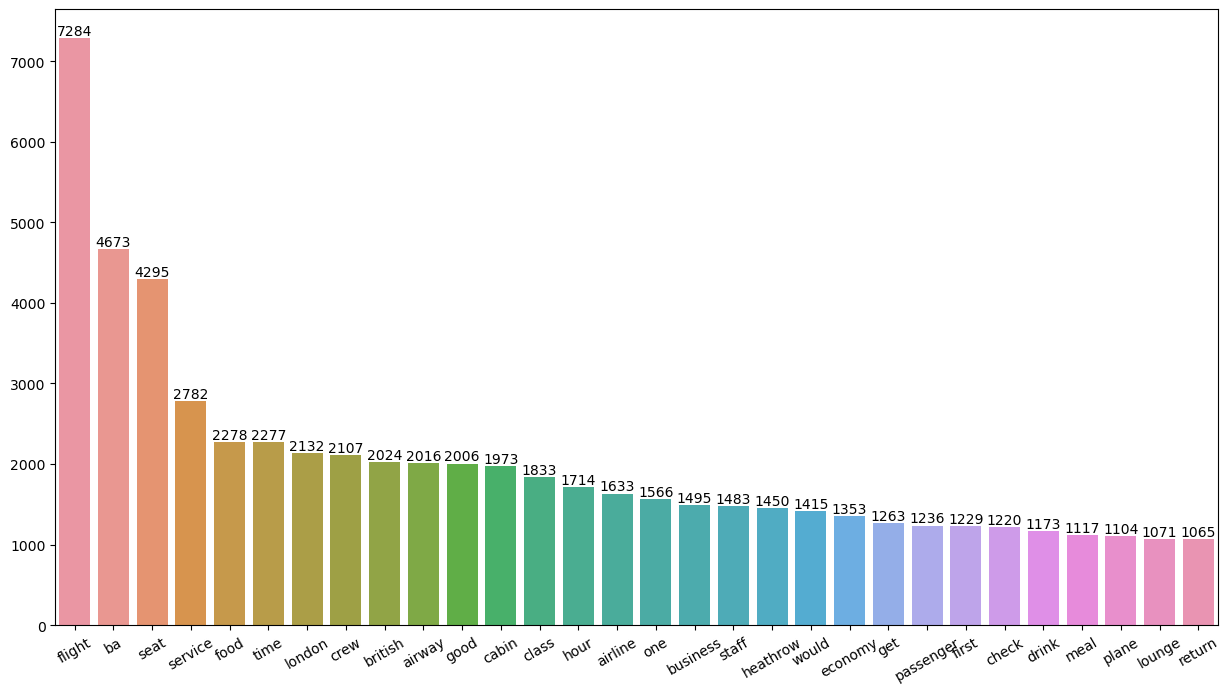

In [44]:

fig, ax = plt.subplots(figsize=(15,8))

all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

In [58]:
import nltk.collocations as collocations
from nltk import FreqDist,bigrams


<AxesSubplot:>

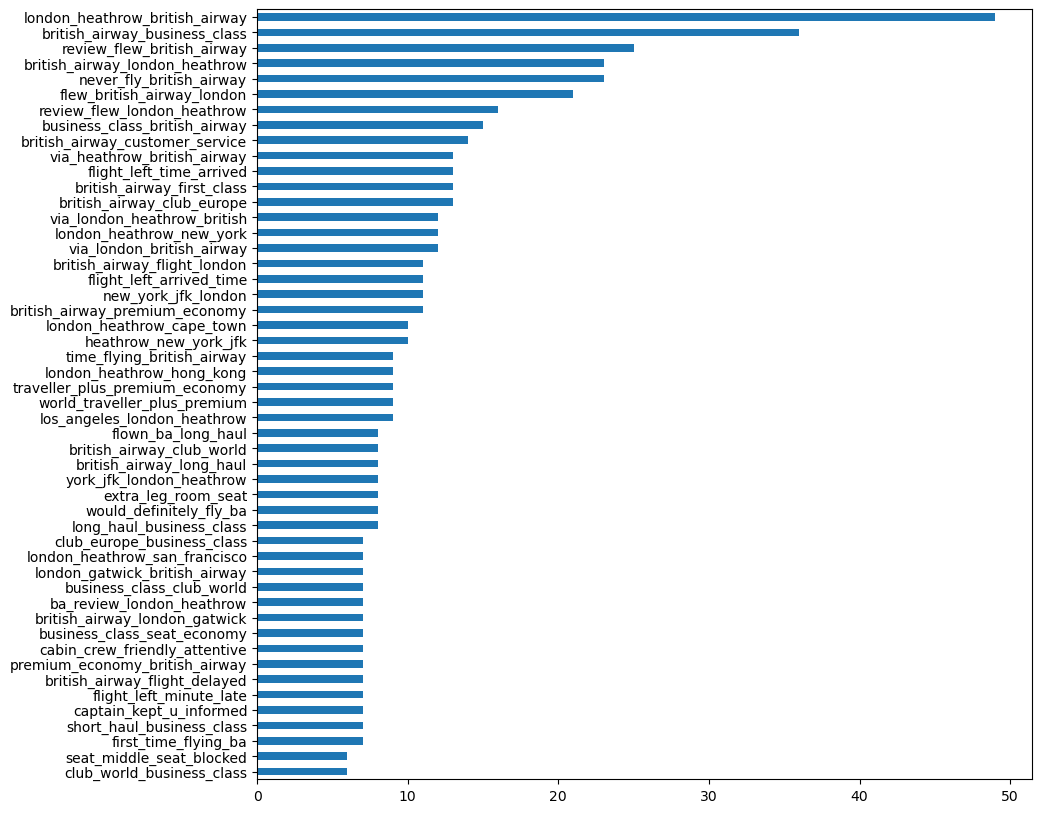

In [61]:

reviews = " ".join(df.clean_review)

word = reviews.split(" ")

new_word = [word for word in words if word not in stopwords]

def get_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    ngrams = ngrams(new_words,number_of_ngrams )

    ngram_fq = FreqDist(ngrams).most_common(50)

    ngram_sorted = {k:v for k,v in sorted(ngram_fq, key=lambda item:item[1])}

    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fq, key=lambda item:item[1])}

    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_dist(new_words,4)
